# **BASIC NEURAL NETWORK (ANN)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MNIST - Modified National Institute of Standards and Technology
* It contains 70000 Hand Written Digit Image Samples (Grayscale)(28x28)
* It is already splitted into training (60000) and testing (10000) samples
* X/Feature - (28x28) Numpy Array
* Y/Target - Digits (0-9) (1d array)

In [2]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
xtrain[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
xtrain[2].shape

(28, 28)

In [7]:
xtrain.max()

255

In [8]:
ytrain[2]

4

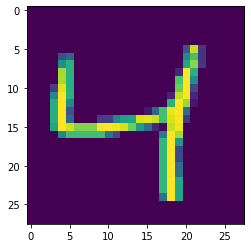

In [26]:
plt.imshow(xtrain[2])
plt.show()

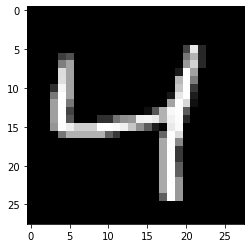

In [9]:
plt.imshow(xtrain[2],cmap='gray')
plt.show()

In [27]:
### scale the data (using a custom scale of 255(max value) to improve accuracy)
xtrain = xtrain/255
xtest = xtest/255

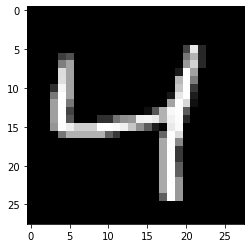

In [28]:
plt.imshow(xtrain[2],cmap='gray')
plt.show()

In [ ]:
xtrain[2]

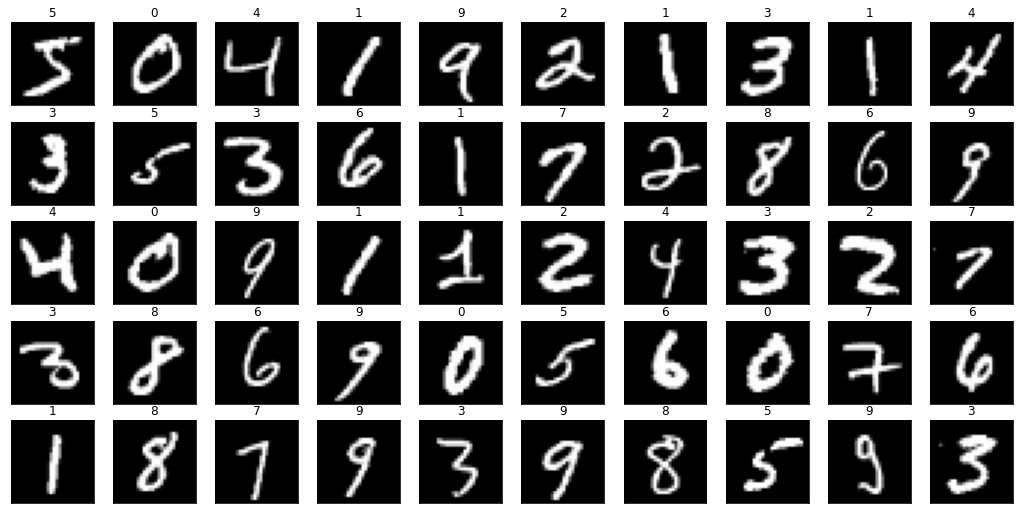

In [33]:
plt.figure(figsize = (18,18))
for i in range(50):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtrain[i],cmap = 'gray') #make sure it's GRAY and not GREY!
  plt.title(""+str(ytrain[i]))
plt.show()

In [11]:
### Neural Network
model = tf.models.Sequential()
model.add(tf.layers.Flatten())    ## input layer
model.add(tf.layers.Dense(32,activation="relu"))   ## hidden layer
model.add(tf.layers.Dense(64,activation="relu"))
model.add(tf.layers.Dense(128,activation="relu"))
model.add(tf.layers.Dense(10,activation="softmax"))   ## output layer
### compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#### Train the model
mymodel = model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest)) #batch_size = 32

Epoch 1/20
1875/1875 [==============================] - 8s 2ms/step - loss: 0.3039 - accuracy: 0.9092 - val_loss: 0.1625 - val_accuracy: 0.9520
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1511 - accuracy: 0.9536 - val_loss: 0.1392 - val_accuracy: 0.9551
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1159 - accuracy: 0.9638 - val_loss: 0.1176 - val_accuracy: 0.9640
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0965 - accuracy: 0.9697 - val_loss: 0.1311 - val_accuracy: 0.9606
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0821 - accuracy: 0.9744 - val_loss: 0.1063 - val_accuracy: 0.9680
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0705 - accuracy: 0.9772 - val_loss: 0.1081 - val_accuracy: 0.9681
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.1102 - val_accuracy:

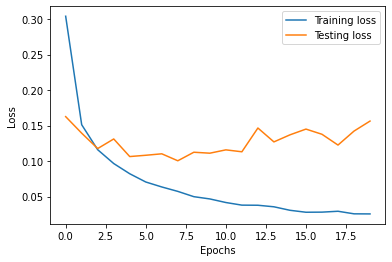

In [13]:
plt.plot(mymodel.history['loss'],label="Training loss")
plt.plot(mymodel.history['val_loss'],label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

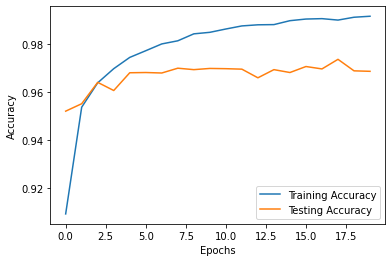

In [14]:
plt.plot(mymodel.history['accuracy'],label="Training Accuracy")
plt.plot(mymodel.history['val_accuracy'],label="Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

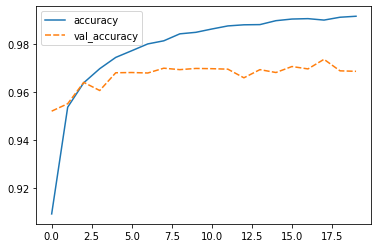

In [36]:
import seaborn as sns
import pandas as pd

history_df = pd.DataFrame.from_dict(mymodel.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

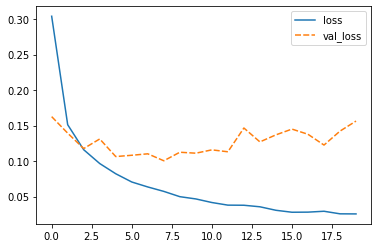

In [37]:
sns.lineplot(data=history_df[['loss', 'val_loss']])

In [15]:
### Prediction
ypred = model.predict(xtest)
ypred

array([[2.23762303e-18, 4.21281447e-11, 3.28750777e-11, ...,
        9.99999523e-01, 3.06375841e-10, 4.53760947e-07],
       [1.00375906e-16, 1.23782002e-06, 9.99998808e-01, ...,
        1.39329529e-11, 6.58896739e-17, 7.12282470e-24],
       [2.64084714e-14, 9.99997497e-01, 5.12556255e-08, ...,
        2.22552467e-06, 4.70120263e-08, 7.90736226e-11],
       ...,
       [6.04562408e-24, 2.45280640e-21, 1.04295743e-16, ...,
        2.60671329e-18, 6.76825441e-22, 1.07205711e-09],
       [6.95326110e-19, 2.12664076e-22, 2.50728476e-16, ...,
        1.52831627e-17, 2.73147915e-14, 5.99496105e-17],
       [1.52940176e-16, 5.88080936e-22, 3.71010383e-19, ...,
        1.46189465e-24, 1.56845011e-16, 3.31784811e-18]], dtype=float32)

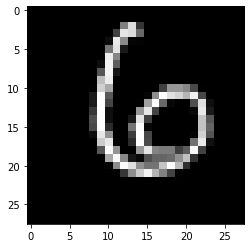

In [16]:
plt.imshow(xtest[100],cmap='gray')
plt.show()

In [17]:
ytest[100]

6

In [18]:
ypred[100]

array([6.2326115e-05, 2.1567547e-07, 6.6064235e-06, 8.0716148e-07,
       1.0293468e-07, 8.3804625e-06, 9.9992096e-01, 6.8880192e-12,
       5.8609061e-07, 3.5813422e-10], dtype=float32)

In [19]:
np.argmax(ypred[100])

6

In [20]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1563 - accuracy: 0.9686


[0.15627840161323547, 0.9685999751091003]

In [21]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
ypred = np.argmax(ypred,axis=1)
ypred

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[ 964,    0,    2,    2,    0,    4,    2,    2,    2,    2],
       [   0, 1126,    2,    1,    0,    0,    1,    1,    4,    0],
       [   4,    3, 1003,   14,    0,    0,    1,    5,    1,    1],
       [   0,    0,    2,  995,    0,    3,    0,    2,    5,    3],
       [   0,    0,    3,    0,  934,    0,    7,    2,    0,   36],
       [   3,    0,    0,   20,    2,  847,    5,    3,    8,    4],
       [   6,    2,    1,    1,    3,    6,  938,    0,    1,    0],
       [   1,    2,   11,    7,    2,    0,    0,  985,    0,   20],
       [   5,    3,   14,   13,    7,    7,    3,    5,  904,   13],
       [   0,    3,    0,    6,    3,    2,    0,    2,    3,  990]])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________
